In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Covid Dataset


## Exploratory Data Analysis

### Looking at the data

In [2]:
covid_path = r"C:\Users\tarun\Downloads\UWaterloo\ECE657A\Assignment4\COVID_dataset.csv"
covid_df = pd.read_csv(covid_path)

In [3]:
covid_df.head()

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,2020-03-30,2020-03-31,2020-03-31,2020-03-30,70s,MALE,OB,Stratford,Yes,43.368662,-81.001913,Fatal
1,2021-01-22,2021-01-24,2021-01-24,2021-01-23,50s,FEMALE,NO KNOWN EPI LINK,Newmarket,NaN,44.048023,-79.480239,Not Resolved
2,2020-03-24,2020-04-14,2020-04-14,2020-04-13,70s,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Resolved
3,2021-01-18,2021-01-21,2021-01-21,2021-01-18,<20,MALE,CC,Mississauga,NaN,43.647471,-79.708893,Not Resolved
4,2020-12-26,2020-12-28,2020-12-28,2020-12-26,60s,MALE,OB,Windsor,Yes,42.308796,-83.033670,Resolved


In [4]:
covid_df["Outbreak_Related"] = covid_df["Outbreak_Related"].fillna("No")
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14860 entries, 0 to 14859
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accurate_Episode_Date    14860 non-null  object 
 1   Case_Reported_Date       14860 non-null  object 
 2   Test_Reported_Date       14657 non-null  object 
 3   Specimen_Date            14738 non-null  object 
 4   Age_Group                14855 non-null  object 
 5   Client_Gender            14860 non-null  object 
 6   Case_AcquisitionInfo     14860 non-null  object 
 7   Reporting_PHU_City       14860 non-null  object 
 8   Outbreak_Related         14860 non-null  object 
 9   Reporting_PHU_Latitude   14860 non-null  float64
 10  Reporting_PHU_Longitude  14860 non-null  float64
 11  Outcome1                 14860 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.4+ MB


0. Timelines
  - Accurate_Episode_Date
  - Case_Reported_Date
  - Test_Reported_Date
  - Specimen_Date 
1. Age_Group 
2. Client_Gender            
3. Case_AcquisitionInfo 
  - Suspected method of exposure to COVID-19, if known.  
  - ‘CC’ (close contact)
  - ‘Missing Information’
  - ‘No known epi link’
  - ‘OB’ (outbreak)
  - ‘Travel’
  - 'Unspecified epi link'  
4. Reporting_PHU_City       
5. Outbreak_Related    
  - A confirmed positive case that is associated with a COVID-19 outbreak in an institution (i.e., long-term care home, retirement home, hospital, group home, shelter, correctional facility, other) will be marked as 'Yes'.COVID-19 in any institutional setting.     
6. Reporting_PHU_Latitude   
7. Reporting_PHU_Longitude  
8. Outcome1                 
  - Severity of the case

In [5]:
print(len(covid_df["Case_Reported_Date"].unique()))
print(covid_df["Case_Reported_Date"].max())
print(covid_df["Case_Reported_Date"].min())


323
2021-01-30
2020-03-08


In [6]:
print(covid_df["Outcome1"].unique())
print(covid_df["Outcome1"].value_counts())

cleanup_obj_data = {"Outcome1" : {"Resolved"      : 0, 
                                  "Not Resolved"  : 1,
                                  "Fatal"         : 2}}

modified_dataframe = covid_df.replace(cleanup_obj_data)
target = modified_dataframe["Outcome1"]

['Fatal' 'Not Resolved' 'Resolved']
Not Resolved    5008
Resolved        4955
Fatal           4897
Name: Outcome1, dtype: int64


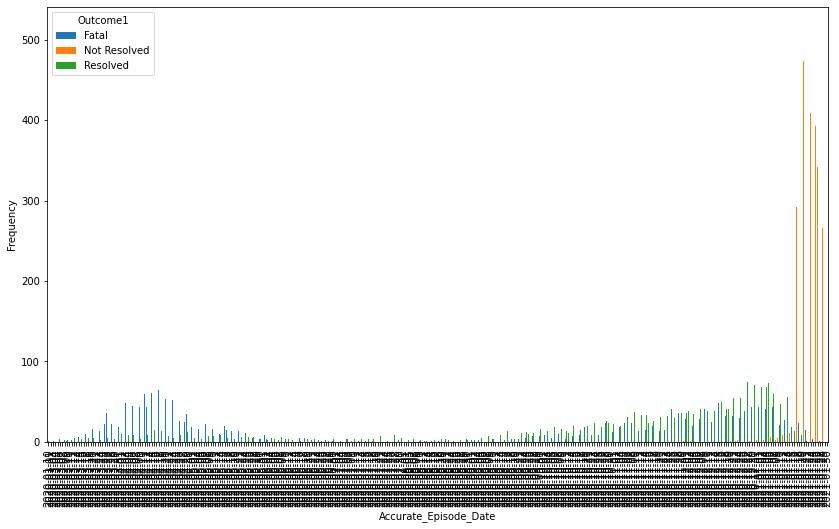

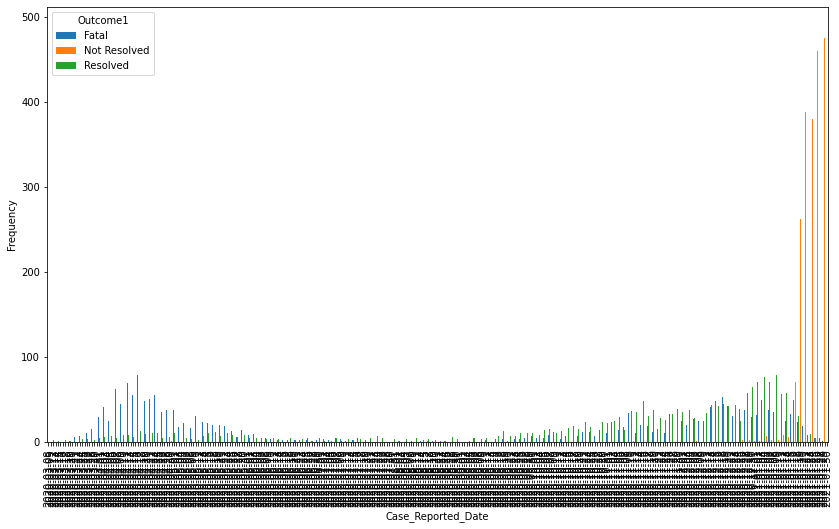

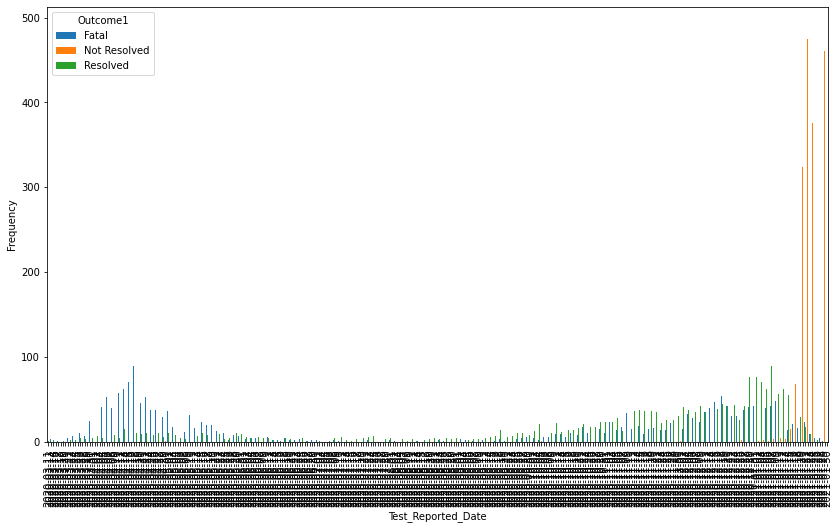

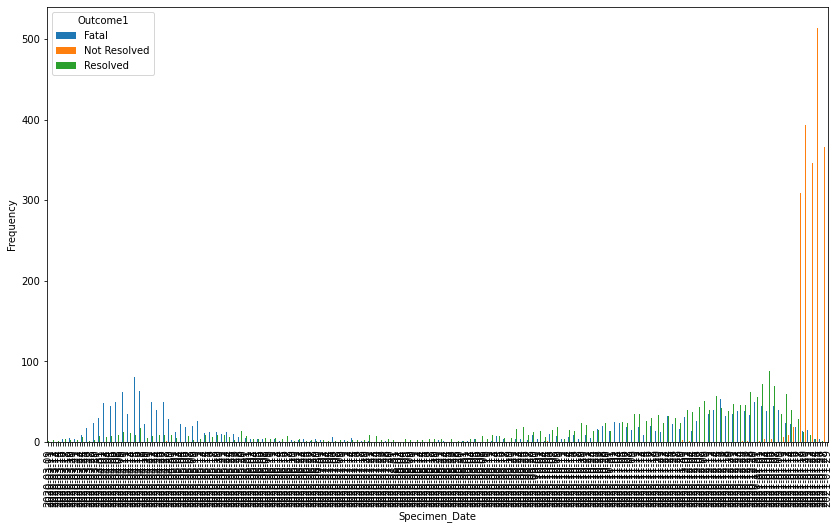

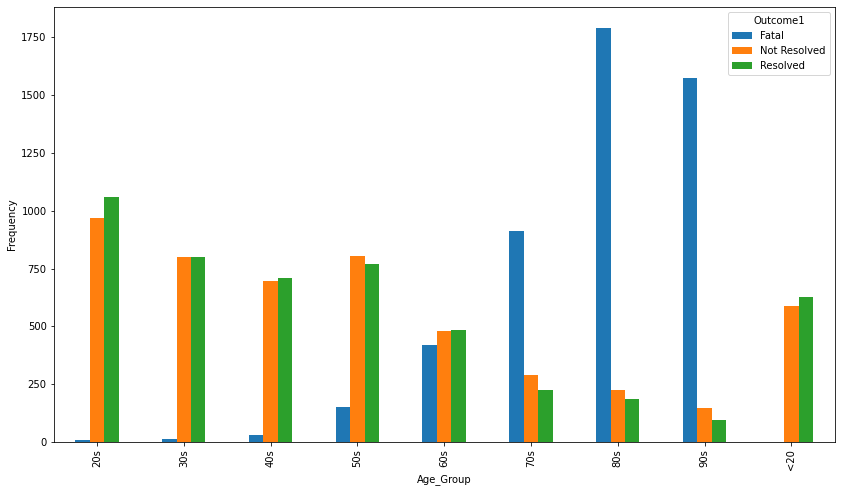

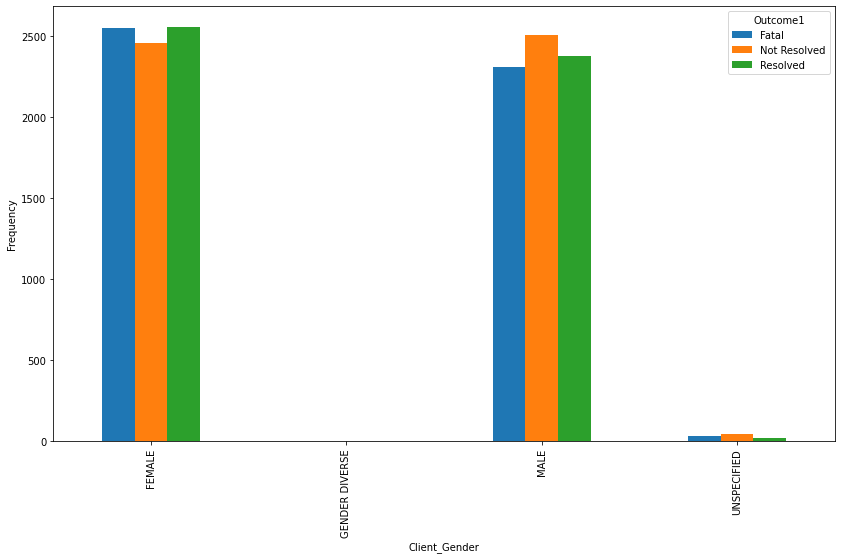

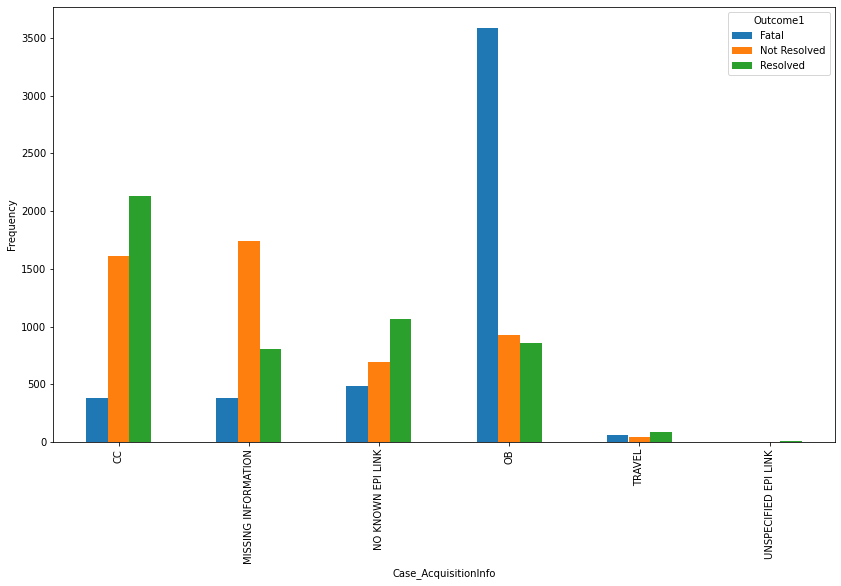

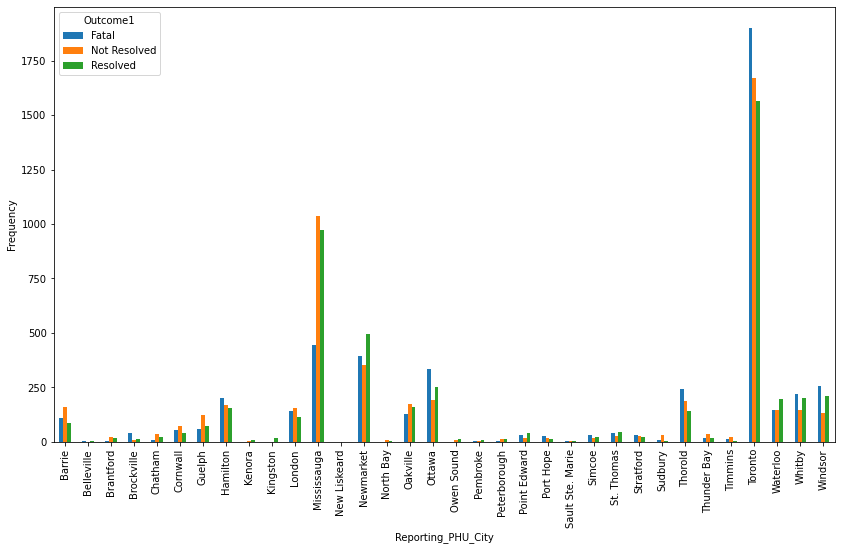

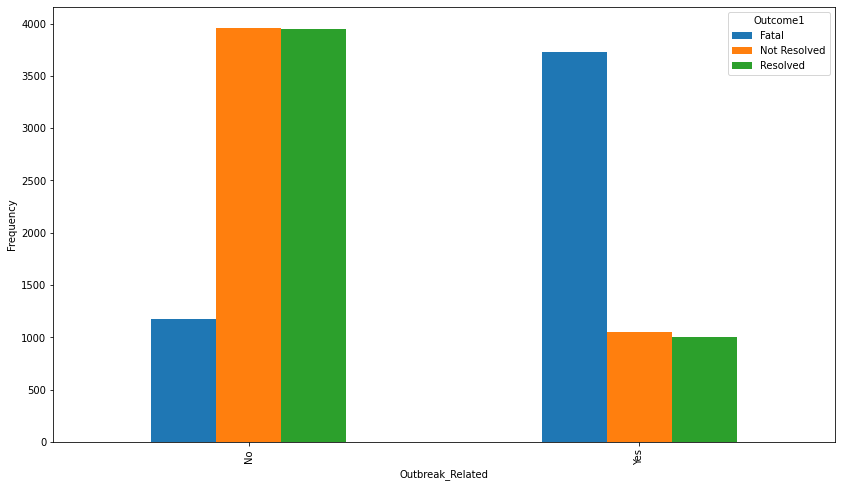

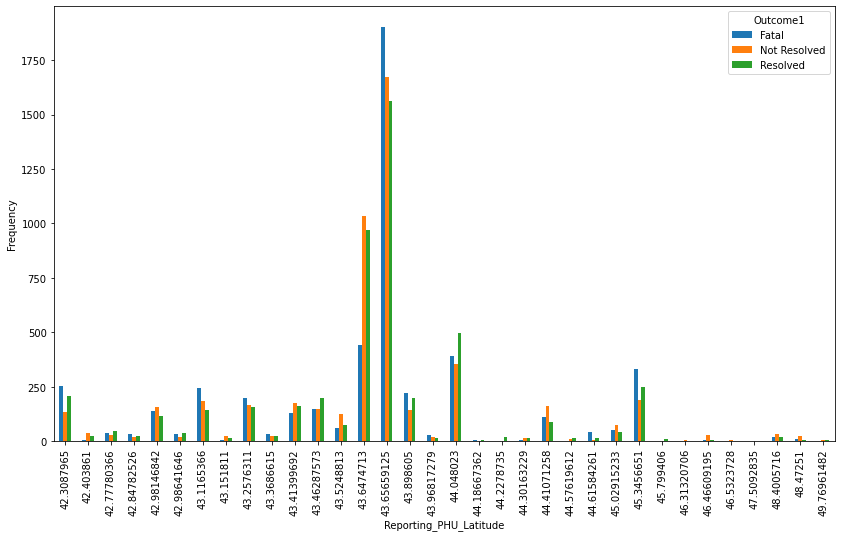

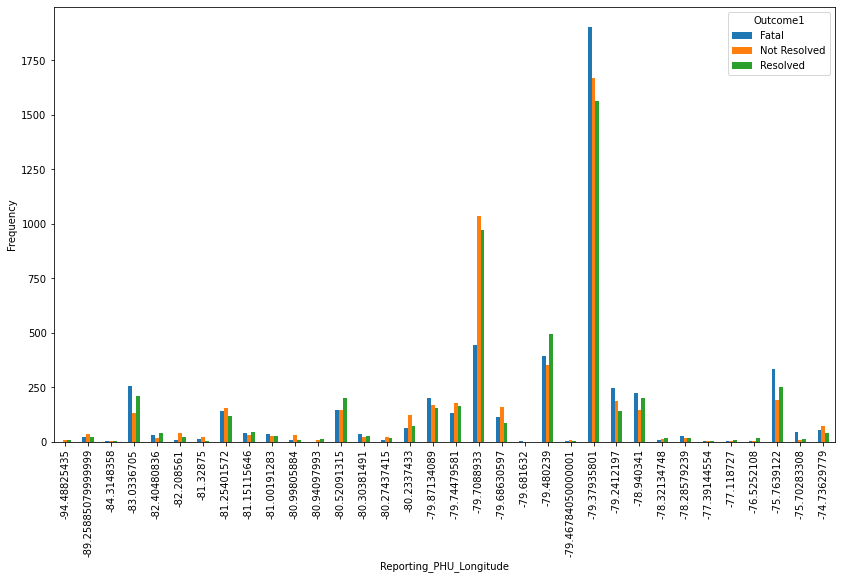

In [7]:
#https://stackoverflow.com/questions/48939795/how-to-plot-a-count-bar-chart-with-a-pandas-df-grouping-by-one-categorical-colu
features = covid_df.columns[0:-1]
for feature in features:
  ax = covid_df.groupby(['Outcome1',feature])[feature].count().unstack(0).plot.bar(figsize=(14,8))
  _ = ax.set_xlabel(feature)
  _ = ax.set_ylabel('Frequency')

### Relation between Dates

In [8]:
dates_df = covid_df[["Accurate_Episode_Date", "Case_Reported_Date",
                    "Test_Reported_Date", "Specimen_Date"]].copy()
type(dates_df["Test_Reported_Date"][0])
dates_df = dates_df.dropna()

In [31]:
dates_df.head()

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date
0,2020-03-30,2020-03-31,2020-03-31,2020-03-30
1,2021-01-22,2021-01-24,2021-01-24,2021-01-23
2,2020-03-24,2020-04-14,2020-04-14,2020-04-13
3,2021-01-18,2021-01-21,2021-01-21,2021-01-18
4,2020-12-26,2020-12-28,2020-12-28,2020-12-26


In [9]:
#Without normalisation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

t = [("cat", OrdinalEncoder(), [0, 1, 2, 3])]
transformer = ColumnTransformer(transformers=t, remainder='passthrough')
# transform training data
modified_dates_arr = transformer.fit_transform(dates_df)

In [10]:
#With normalisation
col_names = ['Accurate_Episode_Date', 'Case_Reported_Date',
             'Test_Reported_Date','Specimen_Date']


In [11]:
transformed_df = pd.DataFrame(modified_dates_arr, columns=col_names)
print(transformed_df.info())
#transformed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14651 entries, 0 to 14650
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Accurate_Episode_Date  14651 non-null  float64
 1   Case_Reported_Date     14651 non-null  float64
 2   Test_Reported_Date     14651 non-null  float64
 3   Specimen_Date          14651 non-null  float64
dtypes: float64(4)
memory usage: 458.0 KB
None


<Figure size 792x792 with 0 Axes>

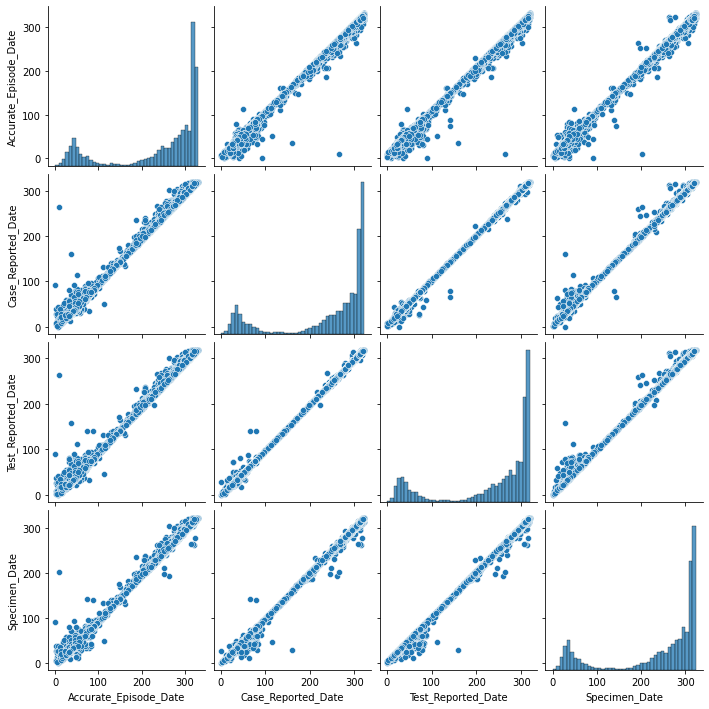

In [41]:
import seaborn as sns

fig = plt.figure(figsize=(11,11), facecolor="white")
#sns.set(rc={'axes.facecolor':'grey', 'figure.facecolor':'white'})
sns.pairplot(transformed_df)
plt.show()

In [53]:
print(len(dates_df["Case_Reported_Date"].unique()))
print(len(dates_df["Accurate_Episode_Date"].unique()))
print(len(dates_df["Test_Reported_Date"].unique()))
print(len(dates_df["Specimen_Date"].unique()))

323
332
320
324


### Rmoving NaN values and deleting rows of sparse features

In [12]:
print(covid_df["Client_Gender"].value_counts())
covid_df[covid_df["Client_Gender"] == "GENDER DIVERSE"]

FEMALE            7562
MALE              7192
UNSPECIFIED        105
GENDER DIVERSE       1
Name: Client_Gender, dtype: int64


,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
12075,2020-05-28,2020-06-04,2020-06-04,2020-06-02,<20,GENDER DIVERSE,CC,Waterloo,No,43.462876,-80.520913,Resolved


In [13]:
#covid_df["Client_Gender"] = covid_df["Client_Gender"].replace("UNSPECIFIED", np.NaN)
covid_df["Client_Gender"] = covid_df["Client_Gender"].replace("GENDER DIVERSE", np.NaN)


In [14]:
print(covid_df["Case_AcquisitionInfo"].value_counts())
covid_df[covid_df["Case_AcquisitionInfo"] == "UNSPECIFIED EPI LINK"]

OB                      5371
CC                      4121
MISSING INFORMATION     2929
NO KNOWN EPI LINK       2242
TRAVEL                   192
UNSPECIFIED EPI LINK       5
Name: Case_AcquisitionInfo, dtype: int64


,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
3421,2020-09-12,2020-09-13,2020-09-13,2020-09-12,20s,MALE,UNSPECIFIED EPI LINK,Newmarket,No,44.048023,-79.480239,Resolved
7446,2020-12-03,2020-12-05,2020-12-05,2020-12-04,60s,MALE,UNSPECIFIED EPI LINK,Newmarket,No,44.048023,-79.480239,Resolved
7656,2020-08-30,2020-08-31,2020-08-31,2020-08-30,30s,FEMALE,UNSPECIFIED EPI LINK,Newmarket,No,44.048023,-79.480239,Resolved
7945,2020-12-07,2020-12-10,2020-12-10,2020-12-09,80s,MALE,UNSPECIFIED EPI LINK,Mississauga,No,43.647471,-79.708893,Resolved
10670,2020-07-28,2020-09-04,2020-09-04,2020-09-03,80s,MALE,UNSPECIFIED EPI LINK,Mississauga,No,43.647471,-79.708893,Resolved


In [15]:
covid_df["Case_AcquisitionInfo"] = covid_df["Case_AcquisitionInfo"].replace("UNSPECIFIED EPI LINK", np.NaN)

In [16]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14860 entries, 0 to 14859
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accurate_Episode_Date    14860 non-null  object 
 1   Case_Reported_Date       14860 non-null  object 
 2   Test_Reported_Date       14657 non-null  object 
 3   Specimen_Date            14738 non-null  object 
 4   Age_Group                14855 non-null  object 
 5   Client_Gender            14859 non-null  object 
 6   Case_AcquisitionInfo     14855 non-null  object 
 7   Reporting_PHU_City       14860 non-null  object 
 8   Outbreak_Related         14860 non-null  object 
 9   Reporting_PHU_Latitude   14860 non-null  float64
 10  Reporting_PHU_Longitude  14860 non-null  float64
 11  Outcome1                 14860 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.4+ MB


In [17]:
missing_values = covid_df.isnull().any(axis=1)
null_values = covid_df[missing_values]
null_values

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
111,2020-12-25,2020-12-31,NaN,NaN,80s,MALE,NO KNOWN EPI LINK,Hamilton,No,43.257631,-79.871341,Fatal
179,2021-01-27,2021-01-29,NaN,2021-01-29,30s,FEMALE,CC,Mississauga,No,43.647471,-79.708893,Not Resolved
415,2021-01-06,2021-01-06,NaN,NaN,90s,FEMALE,OB,London,Yes,42.981468,-81.254016,Fatal
420,2020-04-14,2020-04-16,NaN,2020-04-14,60s,FEMALE,OB,London,Yes,42.981468,-81.254016,Fatal
441,2020-10-18,2020-10-22,NaN,NaN,60s,FEMALE,OB,Cornwall,No,45.029152,-74.736298,Resolved
...,...,...,...,...,...,...,...,...,...,...,...,...
14327,2021-01-07,2021-01-12,NaN,NaN,20s,MALE,CC,London,No,42.981468,-81.254016,Resolved
14369,2021-01-19,2021-01-19,NaN,NaN,20s,MALE,OB,London,Yes,42.981468,-81.254016,Not Resolved
14398,2021-01-21,2021-01-21,NaN,NaN,20s,FEMALE,CC,London,No,42.981468,-81.254016,Not Resolved
14594,2020-11-25,2020-11-30,NaN,NaN,20s,MALE,CC,Newmarket,No,44.048023,-79.480239,Resolved


In [18]:

covid_df["Test_Reported_Date"] = covid_df["Test_Reported_Date"].fillna(covid_df["Accurate_Episode_Date"])
covid_df["Specimen_Date"]= covid_df["Specimen_Date"].fillna(covid_df["Case_Reported_Date"])
covid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14860 entries, 0 to 14859
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accurate_Episode_Date    14860 non-null  object 
 1   Case_Reported_Date       14860 non-null  object 
 2   Test_Reported_Date       14860 non-null  object 
 3   Specimen_Date            14860 non-null  object 
 4   Age_Group                14855 non-null  object 
 5   Client_Gender            14859 non-null  object 
 6   Case_AcquisitionInfo     14855 non-null  object 
 7   Reporting_PHU_City       14860 non-null  object 
 8   Outbreak_Related         14860 non-null  object 
 9   Reporting_PHU_Latitude   14860 non-null  float64
 10  Reporting_PHU_Longitude  14860 non-null  float64
 11  Outcome1                 14860 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.4+ MB


In [19]:
covid_df.head()

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,2020-03-30,2020-03-31,2020-03-31,2020-03-30,70s,MALE,OB,Stratford,Yes,43.368662,-81.001913,Fatal
1,2021-01-22,2021-01-24,2021-01-24,2021-01-23,50s,FEMALE,NO KNOWN EPI LINK,Newmarket,No,44.048023,-79.480239,Not Resolved
2,2020-03-24,2020-04-14,2020-04-14,2020-04-13,70s,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Resolved
3,2021-01-18,2021-01-21,2021-01-21,2021-01-18,<20,MALE,CC,Mississauga,No,43.647471,-79.708893,Not Resolved
4,2020-12-26,2020-12-28,2020-12-28,2020-12-26,60s,MALE,OB,Windsor,Yes,42.308796,-83.033670,Resolved


In [20]:
covid_df = covid_df.dropna()
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14849 entries, 0 to 14859
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accurate_Episode_Date    14849 non-null  object 
 1   Case_Reported_Date       14849 non-null  object 
 2   Test_Reported_Date       14849 non-null  object 
 3   Specimen_Date            14849 non-null  object 
 4   Age_Group                14849 non-null  object 
 5   Client_Gender            14849 non-null  object 
 6   Case_AcquisitionInfo     14849 non-null  object 
 7   Reporting_PHU_City       14849 non-null  object 
 8   Outbreak_Related         14849 non-null  object 
 9   Reporting_PHU_Latitude   14849 non-null  float64
 10  Reporting_PHU_Longitude  14849 non-null  float64
 11  Outcome1                 14849 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.5+ MB


In [21]:
features = covid_df.columns[4:-1]
for feature in features:
  print(feature, np.sort(covid_df[feature].unique()))
  print("")

Age_Group ['20s' '30s' '40s' '50s' '60s' '70s' '80s' '90s' '<20']

Client_Gender ['FEMALE' 'MALE' 'UNSPECIFIED']

Case_AcquisitionInfo ['CC' 'MISSING INFORMATION' 'NO KNOWN EPI LINK' 'OB' 'TRAVEL']

Reporting_PHU_City ['Barrie' 'Belleville' 'Brantford' 'Brockville' 'Chatham' 'Cornwall'
 'Guelph' 'Hamilton' 'Kenora' 'Kingston' 'London' 'Mississauga'
 'New Liskeard' 'Newmarket' 'North Bay' 'Oakville' 'Ottawa' 'Owen Sound'
 'Pembroke' 'Peterborough' 'Point Edward' 'Port Hope' 'Sault Ste. Marie'
 'Simcoe' 'St. Thomas' 'Stratford' 'Sudbury' 'Thorold' 'Thunder Bay'
 'Timmins' 'Toronto' 'Waterloo' 'Whitby' 'Windsor']

Outbreak_Related ['No' 'Yes']

Reporting_PHU_Latitude [42.3087965  42.403861   42.77780366 42.84782526 42.98146842 42.98641646
 43.1165366  43.151811   43.2576311  43.3686615  43.41399692 43.46287573
 43.5248813  43.6474713  43.65659125 43.898605   43.96817279 44.048023
 44.18667362 44.2278735  44.30163229 44.41071258 44.57619612 44.61584261
 45.02915233 45.3456651  45.799406   

In [22]:
test_df = covid_df.copy()
test_df = test_df.drop(["Reporting_PHU_City"], axis=1)

In [23]:
cleanup_obj_data = {"Age_Group" : {"<20" : 0, "20s"  : 1, "30s" : 2,
                                   "40s"  : 3, "50s"  : 4, "60s" : 5,
                                   "70s"  : 6, "80s"  : 7, "90s"  : 8,},
                    "Outcome1" : {"Resolved"      : 0, 
                                  "Not Resolved"  : 1,
                                  "Fatal"         : 2}}
modified_dataframe = test_df.replace(cleanup_obj_data)

In [24]:
modified_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14849 entries, 0 to 14859
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accurate_Episode_Date    14849 non-null  object 
 1   Case_Reported_Date       14849 non-null  object 
 2   Test_Reported_Date       14849 non-null  object 
 3   Specimen_Date            14849 non-null  object 
 4   Age_Group                14849 non-null  int64  
 5   Client_Gender            14849 non-null  object 
 6   Case_AcquisitionInfo     14849 non-null  object 
 7   Outbreak_Related         14849 non-null  object 
 8   Reporting_PHU_Latitude   14849 non-null  float64
 9   Reporting_PHU_Longitude  14849 non-null  float64
 10  Outcome1                 14849 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 1.4+ MB


### Data Pre-processing: Ordinal Encoding

In [25]:

col_names = ['Accurate_Episode_Date', 'Case_Reported_Date',
             'Test_Reported_Date','Specimen_Date', 
             'Client_Gender', 'Case_AcquisitionInfo', 'Outbreak_Related',
              'Age_Group','Reporting_PHU_Latitude', 'Reporting_PHU_Longitude',
             'Outcome1']


#### without scaling

In [26]:
#Without normalisation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

t = [("cat", OrdinalEncoder(), [0, 1, 2, 3, 5, 6, 7])]
transformer = ColumnTransformer(transformers=t, remainder='passthrough')
# transform training data
modified_numpy_arr = transformer.fit_transform(modified_dataframe)

#### with scaling

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

t = [("cat", OrdinalEncoder(), [1, 2, 3]), ("num", MinMaxScaler(), [4,5])]
transformer = ColumnTransformer(transformers=t, remainder='passthrough')
# transform training data
modified_numpy_arr = transformer.fit_transform(modified_dataframe)

In [27]:
print(modified_numpy_arr)

[[ 29.          21.          19.         ...  43.3686615  -81.00191283
    2.        ]
 [323.         316.         314.         ...  44.048023   -79.480239
    1.        ]
 [ 23.          35.          33.         ...  43.65659125 -79.37935801
    0.        ]
 ...
 [277.         269.         267.         ...  43.6474713  -79.7088933
    0.        ]
 [262.         255.         253.         ...  44.048023   -79.480239
    0.        ]
 [321.         319.         317.         ...  43.6474713  -79.7088933
    1.        ]]


In [28]:
transformed_df = pd.DataFrame(modified_numpy_arr, columns=col_names)
print(transformed_df.info())
transformed_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14849 entries, 0 to 14848
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accurate_Episode_Date    14849 non-null  float64
 1   Case_Reported_Date       14849 non-null  float64
 2   Test_Reported_Date       14849 non-null  float64
 3   Specimen_Date            14849 non-null  float64
 4   Client_Gender            14849 non-null  float64
 5   Case_AcquisitionInfo     14849 non-null  float64
 6   Outbreak_Related         14849 non-null  float64
 7   Age_Group                14849 non-null  float64
 8   Reporting_PHU_Latitude   14849 non-null  float64
 9   Reporting_PHU_Longitude  14849 non-null  float64
 10  Outcome1                 14849 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB
None


,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Client_Gender,Case_AcquisitionInfo,Outbreak_Related,Age_Group,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,29.0,21.0,19.0,20.0,1.0,3.0,1.0,6.0,43.368662,-81.001913,2.0
1,323.0,316.0,314.0,317.0,0.0,2.0,0.0,4.0,44.048023,-79.480239,1.0
2,23.0,35.0,33.0,34.0,0.0,3.0,1.0,6.0,43.656591,-79.379358,0.0
3,319.0,313.0,311.0,312.0,1.0,0.0,0.0,0.0,43.647471,-79.708893,1.0
4,296.0,289.0,287.0,289.0,1.0,3.0,1.0,5.0,42.308796,-83.033670,0.0


In [ ]:
convert_dict = {'Accurate_Episode_Date': int, 
                'Accurate_Episode_Date': int, 
                'Test_Reported_Date': int, 
                'Specimen_Date': int, 
                'Client_Gender': int, 
                'Case_AcquisitionInfo': int,
                'Outbreak_Related': int,
                'Reporting_PHU_Latitude': float,
                'Reporting_PHU_Longitude': float,
                'Age_Group': int,
                'Outcome1': int
               } 
  
transformed_df = transformed_df.astype(convert_dict) 
print(transformed_df.dtypes) 

### Data Pre-processing: One Hot Encoding

In [ ]:
"""
col_names = ['Client_Gender_F', 'Client_Gender_Diverse','Client_Gender_M','Client_Gender_USPEC', 
             'Case_Acqui_CC', 'Case_Acqui_MISSING_INFO', 'Case_Acqui_NO_KNOWN_EPI_LINK',
             'Case_Acqui_OB', 'Case_Acqui_TRAVEL','Case_Acqui_UNSPECIFIED_EPI_LINK',
             'Outbreak_Related_No', 'Outbreak_Related_Yes',
             'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude',
             'Age_Group', 'Outcome1']

"""

"\ncol_names = ['Client_Gender_F', 'Client_Gender_Diverse','Client_Gender_M','Client_Gender_USPEC', \n             'Case_Acqui_CC', 'Case_Acqui_MISSING_INFO', 'Case_Acqui_NO_KNOWN_EPI_LINK',\n             'Case_Acqui_OB', 'Case_Acqui_TRAVEL','Case_Acqui_UNSPECIFIED_EPI_LINK',\n             'Outbreak_Related_No', 'Outbreak_Related_Yes',\n             'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude',\n             'Age_Group', 'Outcome1']\n\n"

In [ ]:

col_names = ['Client_Gender_F','Client_Gender_M', 'Client_Gender_USPEC', 
             'Case_Acqui_CC', 'Case_Acqui_MISSING_INFO', 'Case_Acqui_NO_KNOWN_EPI_LINK',
             'Case_Acqui_OB', 'Case_Acqui_TRAVEL',
             'Outbreak_Related_No', 'Outbreak_Related_Yes',
             'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude',
             'Age_Group', 'Outcome1']


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

t = [("cat", OneHotEncoder(), [1, 2, 3]), ("num", MinMaxScaler(), [4,5])]
transformer = ColumnTransformer(transformers=t, remainder='passthrough')
# transform training data
modified_numpy_arr = transformer.fit_transform(modified_dataframe)

In [ ]:
transformed_df = pd.DataFrame(modified_numpy_arr, columns= col_names)
print(transformed_df.info())
transformed_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14849 entries, 0 to 14848
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Client_Gender_F               14849 non-null  float64
 1   Client_Gender_M               14849 non-null  float64
 2   Client_Gender_USPEC           14849 non-null  float64
 3   Case_Acqui_CC                 14849 non-null  float64
 4   Case_Acqui_MISSING_INFO       14849 non-null  float64
 5   Case_Acqui_NO_KNOWN_EPI_LINK  14849 non-null  float64
 6   Case_Acqui_OB                 14849 non-null  float64
 7   Case_Acqui_TRAVEL             14849 non-null  float64
 8   Outbreak_Related_No           14849 non-null  float64
 9   Outbreak_Related_Yes          14849 non-null  float64
 10  Reporting_PHU_Latitude        14849 non-null  float64
 11  Reporting_PHU_Longitude       14849 non-null  float64
 12  Age_Group                     14849 non-null  float64
 13  O

,Client_Gender_F,Client_Gender_M,Client_Gender_USPEC,Case_Acqui_CC,Case_Acqui_MISSING_INFO,Case_Acqui_NO_KNOWN_EPI_LINK,Case_Acqui_OB,Case_Acqui_TRAVEL,Outbreak_Related_No,Outbreak_Related_Yes,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Age_Group,Outcome1
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.142057,0.682785,6.0,2.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.233115,0.759824,4.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.180650,0.764932,6.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.179427,0.748248,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.579921,5.0,0.0


## Train-Valid-Test Split

In [29]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14849 entries, 0 to 14848
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accurate_Episode_Date    14849 non-null  float64
 1   Case_Reported_Date       14849 non-null  float64
 2   Test_Reported_Date       14849 non-null  float64
 3   Specimen_Date            14849 non-null  float64
 4   Client_Gender            14849 non-null  float64
 5   Case_AcquisitionInfo     14849 non-null  float64
 6   Outbreak_Related         14849 non-null  float64
 7   Age_Group                14849 non-null  float64
 8   Reporting_PHU_Latitude   14849 non-null  float64
 9   Reporting_PHU_Longitude  14849 non-null  float64
 10  Outcome1                 14849 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


In [186]:
del X_train, X_test, y_train, y_test
del  X_valid, y_valid

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from keras.utils import to_categorical

X = transformed_df.drop(["Outcome1"], axis=1)
y = transformed_df["Outcome1"]
y_enc = to_categorical(y) 
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size = 0.2,
                                                    random_state = 275)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.25,
                                                      random_state = 275)

print("""Examples in Train set    : {} 
Examples in Validate set : {} 
Examples in Test set     : {}""".format(len(X_train), len(X_valid), len(X_test)))

Examples in Train set    : 8909 
Examples in Validate set : 2970 
Examples in Test set     : 2970


## Preparing DNN

In [31]:
from time import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import TensorBoard

In [34]:
model = Sequential([
  Dense(256, input_dim=10, activation='relu'),
  Dense(128,activation='relu'),
  Dropout(0.2),
  Dense(64,activation='relu'),
  Dropout(0.2),
  Dense(3, activation='softmax')
  ])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

tensorboard = TensorBoard(log_dir=r"C:\Users\tarun\Downloads\UWaterloo\ECE657A\Assignment4\logs\logs{}".format(time()))



In [36]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_valid,y_valid),
          batch_size=256,epochs=100,
          callbacks = [tensorboard])

Epoch 1/100
35/35 [==============================] - 3s 75ms/step - loss: 0.3800 - accuracy: 0.8693 - val_loss: 0.3439 - val_accuracy: 0.8630
Epoch 2/100
35/35 [==============================] - 0s 9ms/step - loss: 0.3696 - accuracy: 0.8716 - val_loss: 0.3375 - val_accuracy: 0.8926
Epoch 3/100
35/35 [==============================] - 0s 10ms/step - loss: 0.3720 - accuracy: 0.8717 - val_loss: 0.3461 - val_accuracy: 0.8744
Epoch 4/100
35/35 [==============================] - 1s 15ms/step - loss: 0.4033 - accuracy: 0.8553 - val_loss: 0.3463 - val_accuracy: 0.8906
Epoch 5/100
35/35 [==============================] - 0s 10ms/step - loss: 0.3721 - accuracy: 0.8696 - val_loss: 0.3076 - val_accuracy: 0.9064
Epoch 6/100
35/35 [==============================] - 1s 17ms/step - loss: 0.3594 - accuracy: 0.8771 - val_loss: 0.3318 - val_accuracy: 0.8953
Epoch 7/100
35/35 [==============================] - 0s 13ms/step - loss: 0.3420 - accuracy: 0.8827 - val_loss: 0.3243 - val_accuracy: 0.8943
Epoch 8

In [197]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 256)               2816      
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 3)                 195       
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
__________________________________________________

In [198]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Testing Accuracy: {}\nTesting Loss: {}".format(test_acc,test_loss))

93/93 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.8973
Testing Accuracy: 0.8973063826560974
Testing Loss: 0.28372400999069214


## Plots

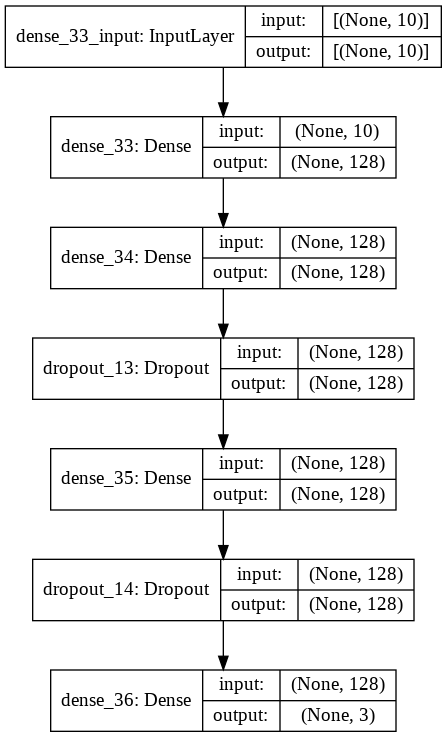

In [194]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='/content/drive/MyDrive/Colab Notebooks/Assignment4/embeddings.png')


## Evaluation

In [199]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
# +1 to change the target values to range(1-5)
y_pred = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)


In [200]:
y_true

array([2, 2, 2, ..., 1, 2, 0])

In [201]:
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[810  53 124]
 [ 14 987  22]
 [ 69  23 868]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       987
           1       0.93      0.96      0.95      1023
           2       0.86      0.90      0.88       960

    accuracy                           0.90      2970
   macro avg       0.90      0.90      0.90      2970
weighted avg       0.90      0.90      0.90      2970



##  Submission


In [202]:
submission_path = "/content/drive/MyDrive/Colab Notebooks/Assignment4/COVID_dataset_Kaggle.csv"

test_data_df = pd.read_csv(submission_path)
test_data_df["Outbreak_Related"] = test_data_df["Outbreak_Related"].fillna("No")


In [203]:
test_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3704 non-null   int64  
 1   Accurate_Episode_Date    3704 non-null   object 
 2   Case_Reported_Date       3704 non-null   object 
 3   Test_Reported_Date       3654 non-null   object 
 4   Specimen_Date            3674 non-null   object 
 5   Age_Group                3704 non-null   object 
 6   Client_Gender            3704 non-null   object 
 7   Case_AcquisitionInfo     3704 non-null   object 
 8   Reporting_PHU_City       3704 non-null   object 
 9   Outbreak_Related         3704 non-null   object 
 10  Reporting_PHU_Latitude   3704 non-null   float64
 11  Reporting_PHU_Longitude  3704 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 347.4+ KB


In [204]:
def pre_processing(covid_df):

  covid_df = covid_df.drop(["id"], axis=1)
  #covid_df = covid_df.drop(["Accurate_Episode_Date","Case_Reported_Date",
  #                       "Test_Reported_Date","Specimen_Date"], axis=1)
  
  cleanup_obj_data = {"Age_Group" : {"<20" : 0, "20s"  : 1, "30s" : 2,
                                   "40s"  : 3, "50s"  : 4, "60s" : 5,
                                   "70s"  : 6, "80s"  : 7, "90s"  : 8,}}
  modified_dataframe = covid_df.replace(cleanup_obj_data)
  modified_dataframe = modified_dataframe.drop(["Reporting_PHU_City"], axis=1)
  
  modified_dataframe["Case_AcquisitionInfo"] = modified_dataframe["Case_AcquisitionInfo"].replace(np.NaN,"Yes")
  modified_dataframe["Test_Reported_Date"] = modified_dataframe["Test_Reported_Date"].fillna(modified_dataframe["Accurate_Episode_Date"])
  modified_dataframe["Specimen_Date"]= modified_dataframe["Specimen_Date"].fillna(modified_dataframe["Case_Reported_Date"])
  print(modified_dataframe.info())
  
  col_names = ['Accurate_Episode_Date', 'Case_Reported_Date',
             'Test_Reported_Date','Specimen_Date', 
             'Client_Gender', 'Case_AcquisitionInfo', 'Outbreak_Related',
              'Age_Group','Reporting_PHU_Latitude', 'Reporting_PHU_Longitude']

  #Transformer ordinal encoder
  t = [("cat", OrdinalEncoder(), [0, 1, 2, 3, 5, 6, 7])]
  transformer = ColumnTransformer(transformers=t, remainder='passthrough')
  # transform training data
  """
  #Transformer one hot encoder
  t = [("cat", OneHotEncoder(), [1, 2, 3]), ("num", MinMaxScaler(), [4,5])]
  transformer = ColumnTransformer(transformers=t, remainder='passthrough')
  # transform training data
  """
  modified_numpy_arr = transformer.fit_transform(modified_dataframe)
  transformed_df = pd.DataFrame(modified_numpy_arr, columns= col_names)
  #print(transformed_df.info())
  return transformed_df

In [205]:
test_data = pre_processing(test_data_df)
test_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accurate_Episode_Date    3704 non-null   object 
 1   Case_Reported_Date       3704 non-null   object 
 2   Test_Reported_Date       3704 non-null   object 
 3   Specimen_Date            3704 non-null   object 
 4   Age_Group                3704 non-null   int64  
 5   Client_Gender            3704 non-null   object 
 6   Case_AcquisitionInfo     3704 non-null   object 
 7   Outbreak_Related         3704 non-null   object 
 8   Reporting_PHU_Latitude   3704 non-null   float64
 9   Reporting_PHU_Longitude  3704 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 289.5+ KB
None


,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Client_Gender,Case_AcquisitionInfo,Outbreak_Related,Age_Group,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,111.0,104.0,108.0,104.0,1.0,0.0,0.0,2.0,43.647471,-79.708893
1,261.0,257.0,262.0,258.0,0.0,2.0,0.0,7.0,44.301632,-78.321347
2,258.0,251.0,256.0,251.0,1.0,0.0,0.0,5.0,43.656591,-79.379358
3,229.0,218.0,223.0,218.0,0.0,3.0,1.0,6.0,43.257631,-79.871341
4,273.0,263.0,268.0,262.0,1.0,1.0,0.0,3.0,43.656591,-79.379358


In [206]:
X_test = test_data.iloc[:,:]
y_pred = model.predict(X_test)
# +1 to change the target values to range(1-5)
y_pred = np.argmax(y_pred, axis = 1)


In [207]:
data_id = pd.Series(range(len(y_pred)), name='id' )
prediction = pd.Series(y_pred, name='Outcome1')

submission = pd.concat([data_id,prediction], axis=1)
submission.head()


,id,Outcome1
0,0,0
1,1,2
2,2,0
3,3,2
4,4,0


In [208]:
cleanup_obj_data = {"Outcome1" : {0: "Resolved", 
                                  1: "Not Resolved",
                                  2: "Fatal"}}

submission = submission.replace(cleanup_obj_data)
submission.head()

,id,Outcome1
0,0,Resolved
1,1,Fatal
2,2,Resolved
3,3,Fatal
4,4,Resolved


In [209]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/Assignment4/results/covid_submission_dates_256.csv', index=False) 

# Fashion MNIST

In [ ]:
import numpy as np
import random

## Loading the data and visualizing some examples

In [38]:
#submission_data = "/content/drive/MyDrive/Colab Notebooks/Assignment4/fashion_mnist_dataset_kaggle_test.npy"
fashion_mnist_path = r"C:\Users\tarun\Downloads\UWaterloo\ECE657A\Assignment4\fashion_mnist_dataset_train.npy"
data = np.load(fashion_mnist_path, allow_pickle=True).item()  

In [39]:
X_images = data["features"]
y_target = data["target"] 

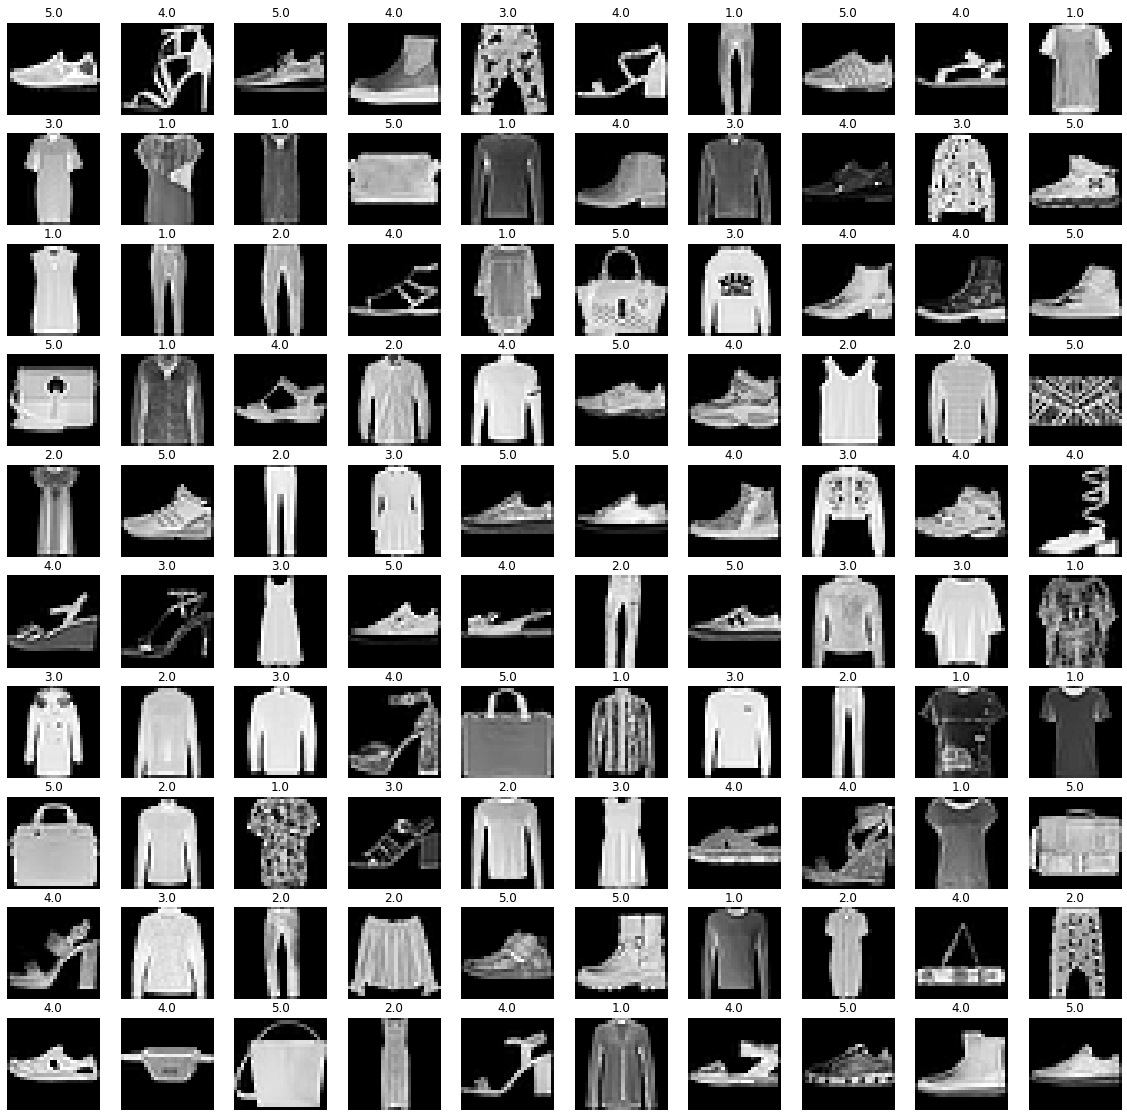

In [41]:
import random

ncols = 10
nrows = 10
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

indices = list(range(len(X_images)))
selected_in2[dices=[]
selected_indices = random.sample(indices, ncols*nrows)


for i, index in enumerate(selected_indices):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  plt.imshow(X_images[index], interpolation='nearest', cmap='gray')
  plt.title(y_target[index])


plt.show()

## Spliting the Data

In [42]:
from sklearn.model_selection import train_test_split

#Augmenting the dimesion of the images to make it tf compatible
X_images =X_images.reshape(len(X_images), 28, 28, 1)
X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(X_images, 
                                                                    y_target,
                                                                    test_size = 0.2,
                                                                    random_state = 0)
print("Total images in dataset = {}".format(len(X_images)))
print("Total images in training dataset = {}".format(len(X_train_img)))
print("Total images in testing dataset = {}".format(len(X_test_img)))

Total images in dataset = 60000
Total images in training dataset = 48000
Total images in testing dataset = 12000


In [1]:
from keras.utils import to_categorical

#one-hot encode target column
y_train = to_categorical(y_train_img)
y_test = to_categorical(y_test_img)
#removing the first cloumn as target ranges from (1-5)
#first column was all zeroes as class 0 does not exist
y_train = y_train[:,1:6]
y_test = y_test[:,1:6]

ModuleNotFoundError: No module named 'keras'

In [44]:
print("Shape of images: ", X_train_img.shape)
print("Shape of label: ", y_train.shape)

Shape of images:  (48000, 28, 28, 1)
Shape of label:  (48000, 5)


## Training a base model

In [49]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [51]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [52]:
history = model.fit(X_train_img,
                    y_train,
                    epochs = 20,
                   callbacks = [tensorboard])

Epoch 1/20
1500/1500 [==============================] - 58s 37ms/step - loss: 0.6651 - accuracy: 0.7254
Epoch 2/20
1500/1500 [==============================] - 55s 37ms/step - loss: 0.3486 - accuracy: 0.8583
Epoch 3/20
1500/1500 [==============================] - 54s 36ms/step - loss: 0.2792 - accuracy: 0.8870
Epoch 4/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2401 - accuracy: 0.9049
Epoch 5/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2213 - accuracy: 0.9109
Epoch 6/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1900 - accuracy: 0.9242
Epoch 7/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1829 - accuracy: 0.9262
Epoch 8/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1586 - accuracy: 0.9361
Epoch 9/20
1500/1500 [==============================] - 43s 29ms/step - loss: 0.1470 - accuracy: 0.9426
Epoch 10/20
1500/1500 [==============================] - 43s 28m

In [53]:
test_loss, test_acc = model.evaluate(X_test_img, y_test)
print("Testing Accuracy: {}/nTesting Loss: {}".format(test_acc,test_loss))

375/375 [==============================] - 3s 8ms/step - loss: 0.3752 - accuracy: 0.9043
Testing Accuracy: 0.9043333530426025/nTesting Loss: 0.37522342801094055


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_img)
# +1 to change the target values to range(1-5)
y_pred = np.argmax(y_pred, axis = 1)+1
y_true = y_test_img


In [55]:
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[2113  125   85    5    6]
 [ 110 2118  188    2    3]
 [  71  143 2166   67    9]
 [   7    0   95 2179  144]
 [   4    4   17   63 2276]]
              precision    recall  f1-score   support

         1.0       0.92      0.91      0.91      2334
         2.0       0.89      0.87      0.88      2421
         3.0       0.85      0.88      0.87      2456
         4.0       0.94      0.90      0.92      2425
         5.0       0.93      0.96      0.95      2364

    accuracy                           0.90     12000
   macro avg       0.91      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



## Visualizing some test examples

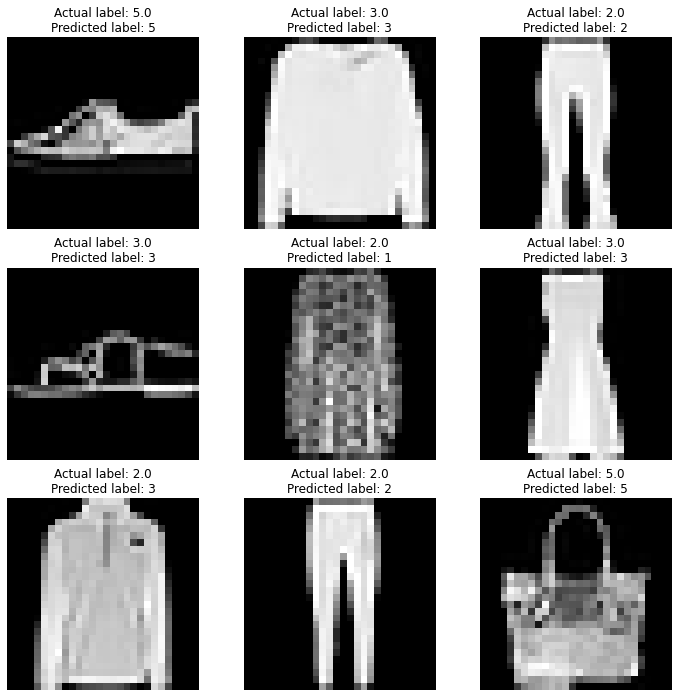

In [ ]:
images = X_test_img.reshape(len(X_test_img),28,28)

ncols = 3
nrows = 3
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

indices = list(range(len(X_test_img)))
selected_indices=[]
selected_indices = random.sample(indices, ncols*nrows)


for i, index in enumerate(selected_indices):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  plt.imshow(images[index], interpolation='nearest', cmap='gray')
  plt.title("Actual label: {}\nPredicted label: {}".format(y_true[index],
                                                           y_pred[index]))


plt.show()

## Visualizing the convolution layers

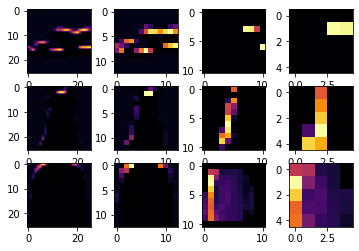

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=10
SECOND_IMAGE=15
THIRD_IMAGE=98
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(X_test_img[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(X_test_img[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(X_test_img[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

##  Submission


In [ ]:
#Augmenting the dimesion of the images to make it tf compatible
X_images =X_images.reshape(len(X_images), 28, 28, 1)

print("Total test images in dataset = {}".format(len(X_images)))

#predicting the class
y_pred = model.predict(X_images)
# +1 to change the target values to range(1-5)
y_pred = np.argmax(y_pred, axis = 1)+1

data_id = pd.Series(range(len(y_pred)), name='id' )
prediction = pd.Series(y_pred, name='target')

submission = pd.concat([data_id,prediction], axis=1)
print(submission.head())

submission.to_csv(r"C:\Users\tarun\Downloads\UWaterloo\ECE657A\Assignment4\submission.csv", index=False) 


Total test images in dataset = 10000
   id  target
0   0       4
1   1       2
2   2       2
3   3       1
4   4       1


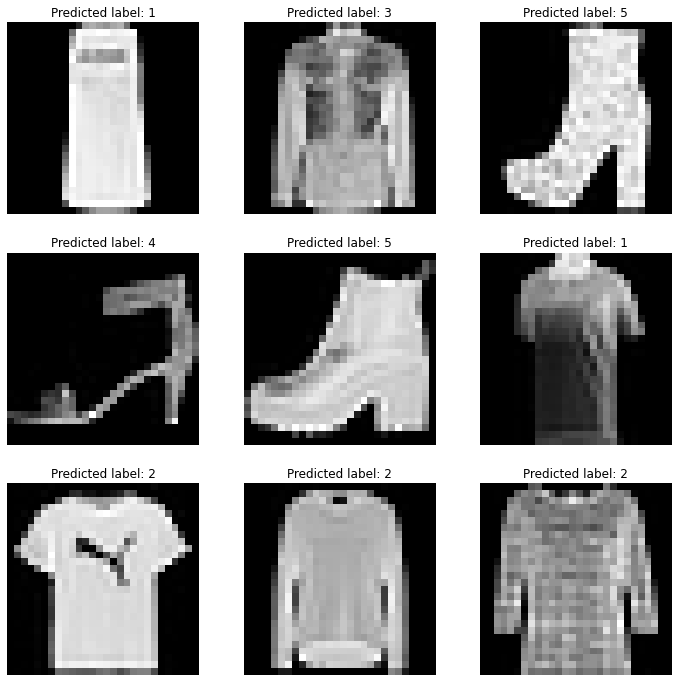

In [ ]:
images = X_images.reshape(len(X_images),28,28)

ncols = 3
nrows = 3
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

indices = list(range(len(X_images)))
selected_indices=[]
selected_indices = random.sample(indices, ncols*nrows)


for i, index in enumerate(selected_indices):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  plt.imshow(images[index], interpolation='nearest', cmap='gray')
  plt.title("Predicted label: {}".format(y_pred[index]))


plt.show()